In [ ]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np

from scipy.signal import periodogram

from astropy.timeseries import LombScargle



```
# This is formatted as code
```

In [ ]:
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_product_category_translation = pd.read_csv('product_category_name_translation.csv')

In [ ]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
df_customers.shape

(99441, 5)

In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
df_customers['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

# Let's ask ChatGPT
*Note: Sample DataFrame is replaced with the relevant one*

In [ ]:
# Count orders per customer
order_counts = df_orders['customer_id'].value_counts()

# Check if any customer made more than one order
if order_counts.max() > 1:
    print("There are customers with more than one order.")
else:
    print("Every customer made just one order.")

Every customer made just one order.


# Let's ask ChatGPT
*Note: Sample DataFrame is replaced with the relevant one*

In [ ]:
# Check the number of unique values in each column
unique_customer_ids = df_customers['customer_id'].nunique()
unique_customer_unique_ids = df_customers['customer_unique_id'].nunique()

print(f"Unique customer_id values: {unique_customer_ids}")
print(f"Unique customer_unique_id values: {unique_customer_unique_ids}")

# Check the relationship between the two columns
relationship = df_customers.groupby('customer_unique_id')['customer_id'].nunique()

print("\nRelationship between customer_unique_id and customer_id:")
relationship

Unique customer_id values: 99441
Unique customer_unique_id values: 96096

Relationship between customer_unique_id and customer_id:


customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    1
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: customer_id, Length: 96096, dtype: int64

# Let's ask ChatGPT

In [ ]:
df = df_customers

# Check the number of unique values in each column
unique_customer_ids = df['customer_id'].nunique()
unique_customer_unique_ids = df['customer_unique_id'].nunique()

print(f"Unique customer_id values: {unique_customer_ids}")
print(f"Unique customer_unique_id values: {unique_customer_unique_ids}")

# Check the relationship between the two columns
relationship = df.groupby('customer_unique_id')['customer_id'].nunique()

print("\nSummary of the relationship between customer_unique_id and customer_id:")
print(f"Min: {relationship.min()}")
print(f"Max: {relationship.max()}")
print(f"Mean: {relationship.mean()}")
print(f"Count of unique customer_id values per customer_unique_id:\n{relationship.value_counts().sort_index()}")

Unique customer_id values: 99441
Unique customer_unique_id values: 96096

Summary of the relationship between customer_unique_id and customer_id:
Min: 1
Max: 17
Mean: 1.0348089410589412
Count of unique customer_id values per customer_unique_id:
1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: customer_id, dtype: int64


# Let's ask ChatGPT

In [ ]:
# Sample DataFrame with duplicate rows
data = {'A': [1, 2, 2, 4, 5, 1],
        'B': [6, 7, 7, 9, 10, 6]}

df = pd.DataFrame(data)

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

print("Original DataFrame:")
print(df)

print("\nDataFrame without duplicates:")
df_no_duplicates

Original DataFrame:
   A   B
0  1   6
1  2   7
2  2   7
3  4   9
4  5  10
5  1   6

DataFrame without duplicates:


,A,B
0,1,6
1,2,7
3,4,9
4,5,10


In [ ]:
# Remove duplicates based on column 'A'
df_no_duplicates = df.drop_duplicates(subset=['A'])

print("\nDataFrame without duplicates based on column 'A':")
df_no_duplicates


DataFrame without duplicates based on column 'A':


,A,B
0,1,6
1,2,7
3,4,9
4,5,10


# Let's ask ChatGPT

In [ ]:
df = df_products

# Display rows with missing values
missing_rows = df[df.isna().any(axis=1)]
missing_rows

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


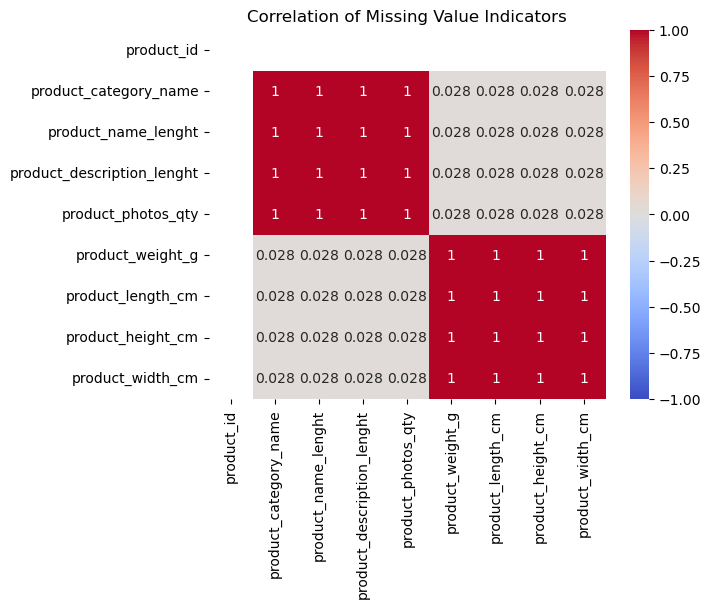

In [ ]:
df = df_products

# Create a DataFrame indicating which values are missing
missing_indicator = df.isna()

# Compute the correlation between the missing value indicators
missing_corr = missing_indicator.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Missing Value Indicators")
plt.show()

# Let's ask ChatGPT

In [ ]:
df_order_reviews['review_creation_date'] = df_order_reviews.review_creation_date.astype('datetime64[ns]')
df_order_reviews['review_answer_timestamp'] = df_order_reviews.review_answer_timestamp.astype('datetime64[ns]')
df_orders['order_purchase_timestamp'] = df_orders.order_purchase_timestamp.astype('datetime64[ns]')
df_orders['order_approved_at'] = df_orders.order_approved_at.astype('datetime64[ns]')
df_orders['order_delivered_carrier_date'] = df_orders.order_delivered_carrier_date.astype('datetime64[ns]')
df_orders['order_delivered_customer_date'] = df_orders.order_delivered_customer_date.astype('datetime64[ns]')
df_orders['order_estimated_delivery_date'] = df_orders.order_estimated_delivery_date.astype('datetime64[ns]')

In [ ]:
# Check for duplicate entries based on unique key constraints
duplicates = df_orders[df_orders.duplicated(subset=['order_id'], keep=False)]
if not duplicates.empty:
    print("Duplicate entries found:")
    print(duplicates)
    # Handle duplicates (e.g., drop or merge rows)

In [ ]:
# Check foreign key constraints
foreign_key_violations = df_orders[~df_orders['order_id'].isin(df_order_payments['order_id'])]
if not foreign_key_violations.empty:
    print("Foreign key violations found:")
    print(foreign_key_violations)
    # Handle violations (e.g., drop rows or correct the foreign key values)

Foreign key violations found:
                               order_id                       customer_id  \
30710  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   

      order_status order_purchase_timestamp   order_approved_at  \
30710    delivered      2016-09-15 12:16:38 2016-09-15 12:16:38   

      order_delivered_carrier_date order_delivered_customer_date  \
30710          2016-11-07 17:11:53           2016-11-09 07:47:38   

      order_estimated_delivery_date  
30710                    2016-10-04  


> We leave handling the foreign key violation issue for the readers as an exercise

# Let's ask ChatGPT

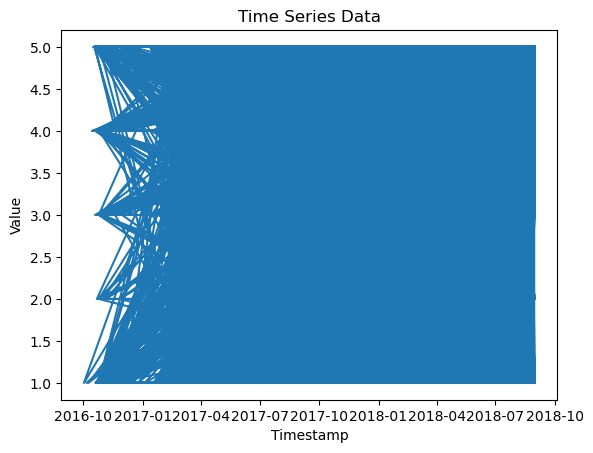

In [ ]:
plt.plot(df_order_reviews['review_creation_date'], df_order_reviews['review_score'])
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.savefig('Autocorrelation_1.png', bbox_inches='tight')

# Let’s ask ChatGPT

In [ ]:
# Create a new column with the timestamp at the desired frequency (e.g., daily)
df_order_reviews['date_daily'] = df_order_reviews['review_creation_date'].dt.date

In [ ]:
# Group by date_daily and calculate the proportion of each score
score_counts = df_order_reviews.groupby(['date_daily', 'review_score']).size().unstack(fill_value=0)
score_proportions = score_counts.div(score_counts.sum(axis=1), axis=0)

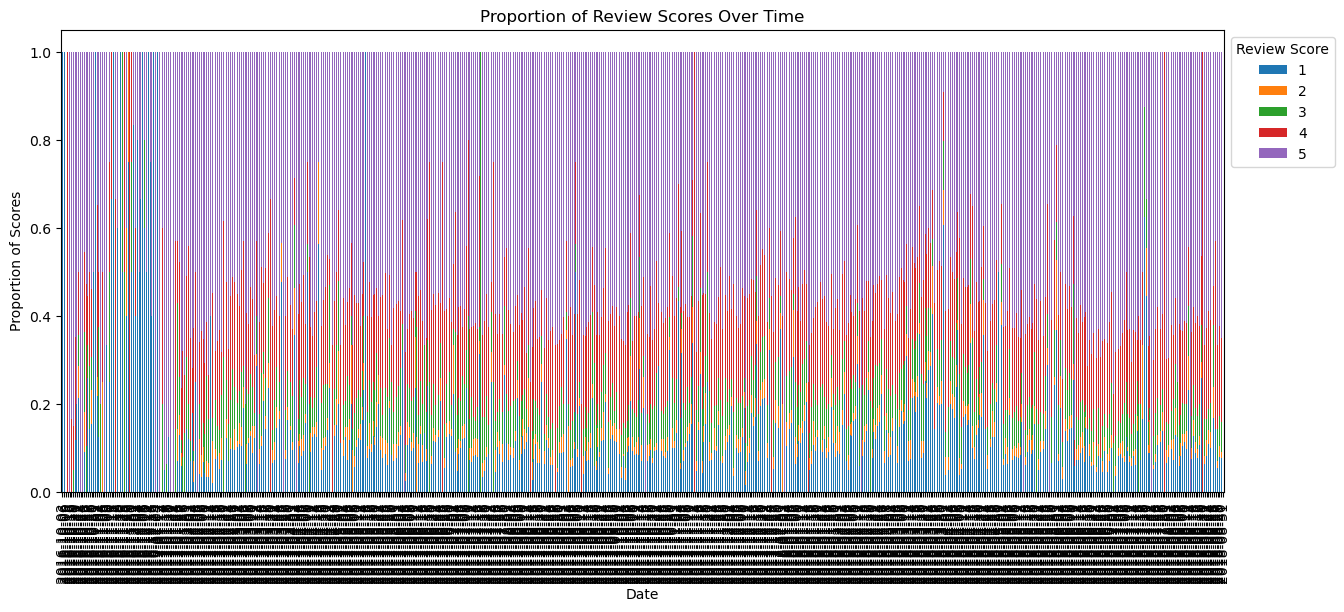

In [ ]:
score_proportions.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.xlabel('Date')
plt.ylabel('Proportion of Scores')
plt.title('Proportion of Review Scores Over Time')
plt.legend(title='Review Score', bbox_to_anchor=(1, 1))
plt.show()

# Let’s ask ChatGPT

In [ ]:
# Create a new column with the timestamp at the desired frequency (e.g., monthly)
df_order_reviews['month'] = df_order_reviews['review_creation_date'].dt.to_period('M')

In [ ]:
# Group by month and calculate the proportion of each score
score_counts = df_order_reviews.groupby(['month', 'review_score']).size().unstack(fill_value=0)
score_proportions = score_counts.div(score_counts.sum(axis=1), axis=0)

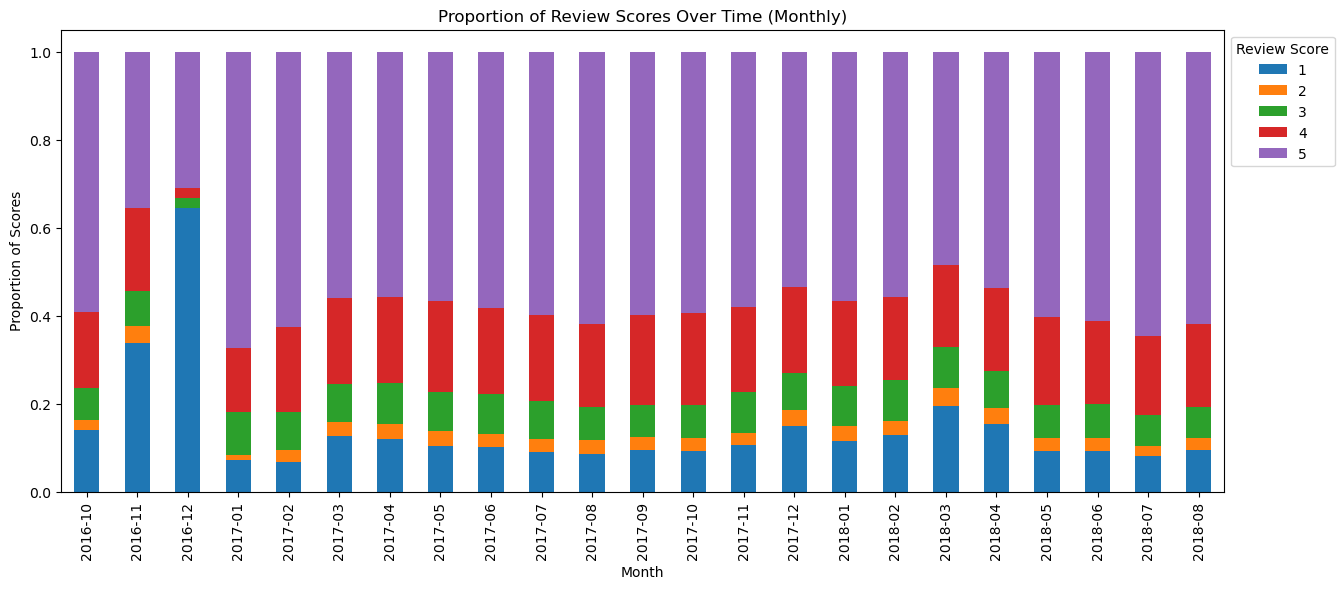

In [ ]:
score_proportions.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.xlabel('Month')
plt.ylabel('Proportion of Scores')
plt.title('Proportion of Review Scores Over Time (Monthly)')
plt.legend(title='Review Score', bbox_to_anchor=(1, 1))
plt.show()

<AxesSubplot: >

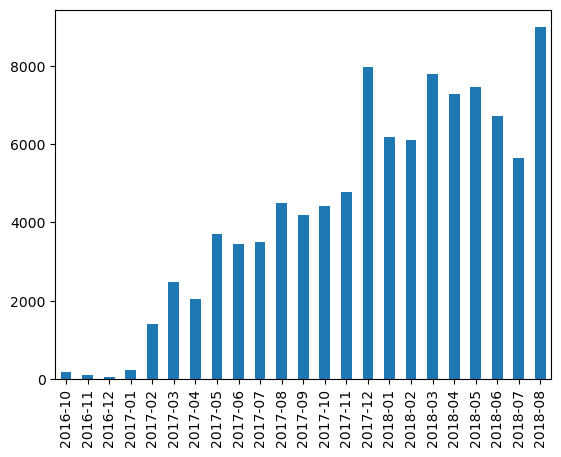

In [ ]:
df_order_reviews['review_creation_date'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')

# Let’s ask ChatGPT

In [ ]:
df_order_reviews['time_diff'] = (df_order_reviews['review_answer_timestamp'] - df_order_reviews['review_creation_date']).dt.total_seconds()

In [ ]:
time_diff_summary = df_order_reviews['time_diff'].describe()
time_diff_summary

count    9.922400e+04
mean     2.720730e+05
std      8.545003e+05
min      7.709000e+03
25%      8.682075e+04
50%      1.447155e+05
75%      2.681480e+05
max      4.481561e+07
Name: time_diff, dtype: float64

In [ ]:
df_order_reviews['time_diff'] = (
    df_order_reviews['review_answer_timestamp'] - df_order_reviews['review_creation_date']
).dt.total_seconds() / 3600

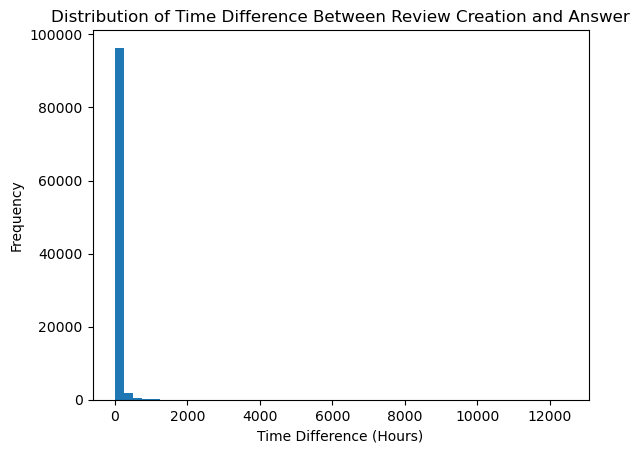

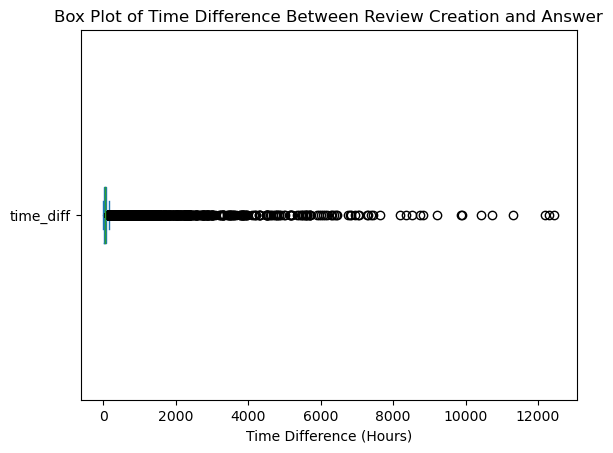

In [ ]:
# Histogram
df_order_reviews['time_diff'].plot(kind='hist', bins=50)
plt.xlabel('Time Difference (Hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Difference Between Review Creation and Answer')
plt.show()

# Box plot
df_order_reviews['time_diff'].plot(kind='box', vert=False)
plt.xlabel('Time Difference (Hours)')
plt.title('Box Plot of Time Difference Between Review Creation and Answer')
plt.show()

# Let's ask ChatGPT

In [ ]:
orders_customers = df_orders.merge(df_customers, on='customer_id', how='left')

In [ ]:
merged_df = df_order_reviews.merge(orders_customers[['order_id', 'customer_unique_id']], on='order_id', how='left')

# Let's ask ChatGPT

In [ ]:
unique_customers_per_order = merged_df.groupby('order_id')['customer_unique_id'].nunique()

In [ ]:
multiple_customers_orders = unique_customers_per_order[unique_customers_per_order > 1]

In [ ]:
if len(multiple_customers_orders) > 0:
    print(f"There are {len(multiple_customers_orders)} orders with reviews from multiple customers.")
    print("\nOrder IDs and the number of unique customers:")
    print(multiple_customers_orders)
else:
    print("There are no orders with reviews from multiple customers.")

There are no orders with reviews from multiple customers.
